In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

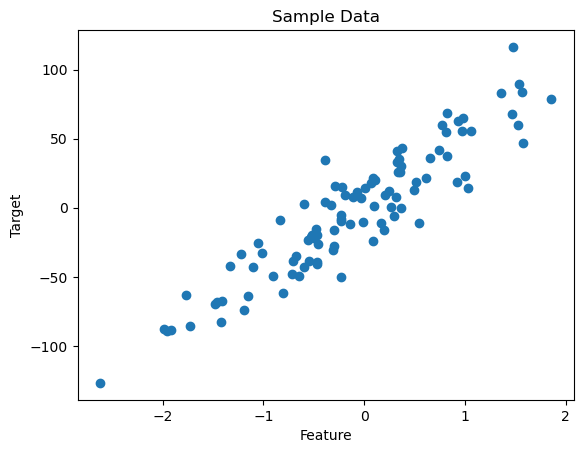

In [3]:
# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
y = y.reshape(-1, 1)  # Make y a column vector

# Plot the data
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Sample Data")
plt.show()

In [4]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr          # learning rate
        self.n_iters = n_iters  # number of iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.n_iters):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Optional: print cost every 100 steps
            if i % 100 == 0:
                cost = np.mean((y_pred - y) ** 2)
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [5]:
model = LinearRegression(lr=0.1, n_iters=1000)
model.fit(X, y)

Iteration 0: Cost = 2132.7317
Iteration 100: Cost = 312.2170
Iteration 200: Cost = 312.2170
Iteration 300: Cost = 312.2170
Iteration 400: Cost = 312.2170
Iteration 500: Cost = 312.2170
Iteration 600: Cost = 312.2170
Iteration 700: Cost = 312.2170
Iteration 800: Cost = 312.2170
Iteration 900: Cost = 312.2170


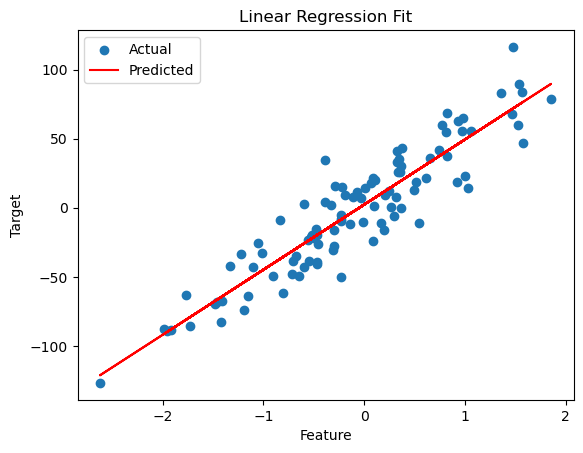

In [6]:
# Predict on training data
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color='red', label="Predicted")
plt.legend()
plt.title("Linear Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [7]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 312.2170
